In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# define the base functions
def harmonic_oscillator(q, p):
    dqdt = p
    dpdt = -q
    return dqdt, dpdt

def simple_pendulum(q, p, epsilon=0.5):
    dqdt = p
    dpdt = epsilon * np.sin(q)
    return dqdt, dpdt

# define the function we will use to solve the above ode
def forward_euler(f, q0, p0, dt=0.0001, steps=1000000):
    q, p, t = [q0], [p0], [0]

    for i in range(steps):
        dqdt, dpdt = f(q[i], p[i])
        q.append(q[i] + dqdt * dt)
        p.append(p[i] + dpdt * dt)
        t.append(t[i] + dt)
    
    return q, p, t

def midpoint(f, q0, p0, dt=0.0001, steps=1000000):
    q, p, t = [q0], [p0], [0]

    for i in range(steps):
        dqdt1, dpdt1 = f(q[i], p[i])
        dqdt2, dpdt2 = f(q[i] + 0.5 * dqdt1 * dt, p[i] + 0.5 * dpdt1 * dt)

        q.append(q[i] + dqdt2 * dt)
        p.append(p[i] + dpdt2 * dt)
        t.append(t[i] + dt)
    
    return q, p, t

def leapfrog_method(f, q0, p0, dt=0.0001, steps=1000000):
    q, p, t = [q0], [p0], [0]
    dt_half = dt * 0.5

    for i in range(steps):
        # first half steps for the momentum
        dqdt1, dpdt1 = f(q[i], p[i])
        p_half = p[i] + dpdt1 * dt_half

        # full step for the position
        q_full = q[i] + dqdt1 * dt

        # second half of the step for the momentum
        _, dpdt2 = f(q_full, p_half)
        p.append(p_half + dpdt2 * dt_half)
        q.append(q_full)
        t.append(t[i] + dt)
    
    return q, p, t

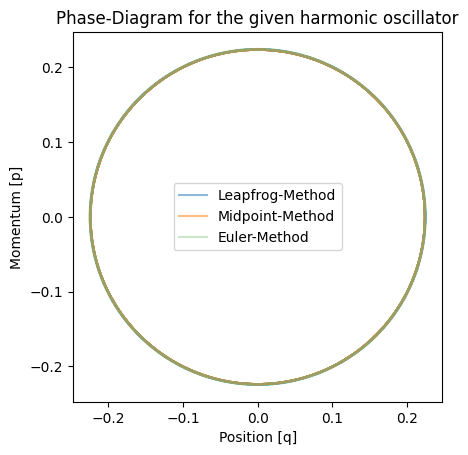

In [59]:
# first part of the exercise, we do the comparison for the simple pendulum
# define the initial conditions
q0 = 0.2
p0 = 0.1

# do the calculations
q_euler, p_euler, time_steps = forward_euler(harmonic_oscillator, q0, p0)
q_midpoint, p_midpoint, _ = midpoint(harmonic_oscillator, q0, p0)
q_leapfrog, p_leapfrog, _ = leapfrog_method(harmonic_oscillator, q0, p0)


# plot what we get
plt.plot(q_leapfrog, p_leapfrog, alpha=0.5, label='Leapfrog-Method')
plt.plot(q_midpoint, p_midpoint, alpha=0.5, label='Midpoint-Method')
plt.plot(q_euler, p_euler, alpha=0.25, label='Euler-Method')
plt.legend()
plt.gca().set_aspect('equal')
plt.title("Phase-Diagram for the given harmonic oscillator")
plt.xlabel("Position [q]")
plt.ylabel("Momentum [p]")
plt.show()

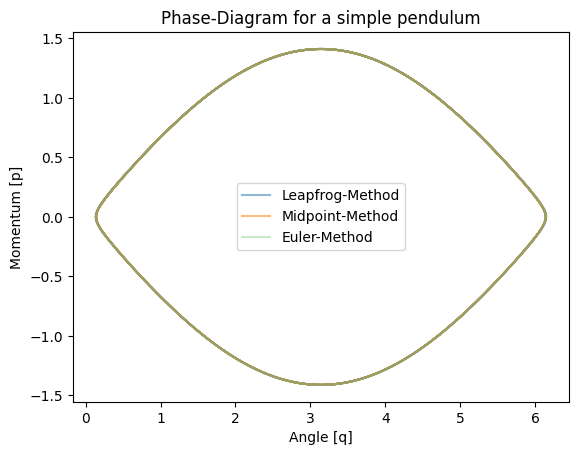

In [60]:
# Second part of the exercise, we do the comparison for the simple pendulum

# define the initial conditions
q0 = 0.2
p0 = 0.1

# do the calculations
q_euler, p_euler, time_steps = forward_euler(simple_pendulum, q0, p0)
q_midpoint, p_midpoint, _ = midpoint(simple_pendulum, q0, p0)
q_leapfrog, p_leapfrog, _ = leapfrog_method(simple_pendulum, q0, p0)


# plot what we get
plt.plot(q_leapfrog, p_leapfrog, alpha=0.5, label='Leapfrog-Method')
plt.plot(q_midpoint, p_midpoint, alpha=0.5, label='Midpoint-Method')
plt.plot(q_euler, p_euler, alpha=0.25, label='Euler-Method')
plt.legend()
plt.title("Phase-Diagram for a simple pendulum")
plt.xlabel("Angle [q]")
plt.ylabel("Momentum [p]")
plt.show()

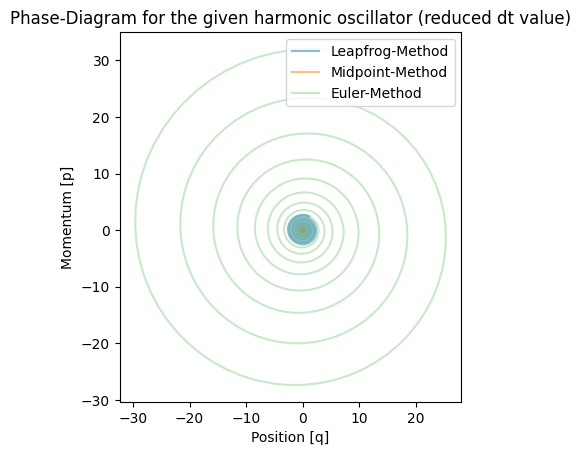

In [61]:
# I just quickly want to check, what happens if I increase dt, because all of these look to good to me

# define the initial conditions
q0 = 0.2
p0 = 0.1

# do the calculations
q_euler, p_euler, time_steps = forward_euler(harmonic_oscillator, q0, p0, dt=0.1, steps=1000)
q_midpoint, p_midpoint, _ = midpoint(harmonic_oscillator, q0, p0, dt=0.1, steps=1000)
q_leapfrog, p_leapfrog, _ = leapfrog_method(harmonic_oscillator, q0, p0, dt=0.1, steps=1000)


# plot what we get
plt.plot(q_leapfrog, p_leapfrog, alpha=0.5, label='Leapfrog-Method')
plt.plot(q_midpoint, p_midpoint, alpha=0.5, label='Midpoint-Method')
plt.plot(q_euler, p_euler, alpha=0.25, label='Euler-Method')
plt.legend()
plt.gca().set_aspect('equal')
plt.title("Phase-Diagram for the given harmonic oscillator (reduced dt value)")
plt.xlabel("Position [q]")
plt.ylabel("Momentum [p]")
plt.show()

# Interestingly the midpoint method still gives the best result. Although I would have thought that this would be done by the leapfrog method
# is it should be used when looking at conservation of energy -> which is given in this case